In [1]:
pip install pandas unicode matplotlib seaborn scikit-learn nltk plotly scipy ipywidgets 


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

# Set LOKY_MAX_CPU_COUNT environment variable to the number of cores you want to use
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Example: Use 4 cores

In [1]:
import pandas as pd
pd.set_option("mode.copy_on_write", True)

# 1.Some Interative Visualizations

In [3]:
# For ipywidgets testing purposes
import ipywidgets as widgets

widgets.IntSlider()


IntSlider(value=0)

## 1.1 Characterization of anomalies per sector

Dropdown(description='Sector:', index=1, options=('Select a sector', 'captacion_tratamiento_distribucion_agua'…

C:\Users\HP\AppData\Local\Temp\ipykernel_17832\3024665938.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = sector_data.groupby('ClienteId').apply(


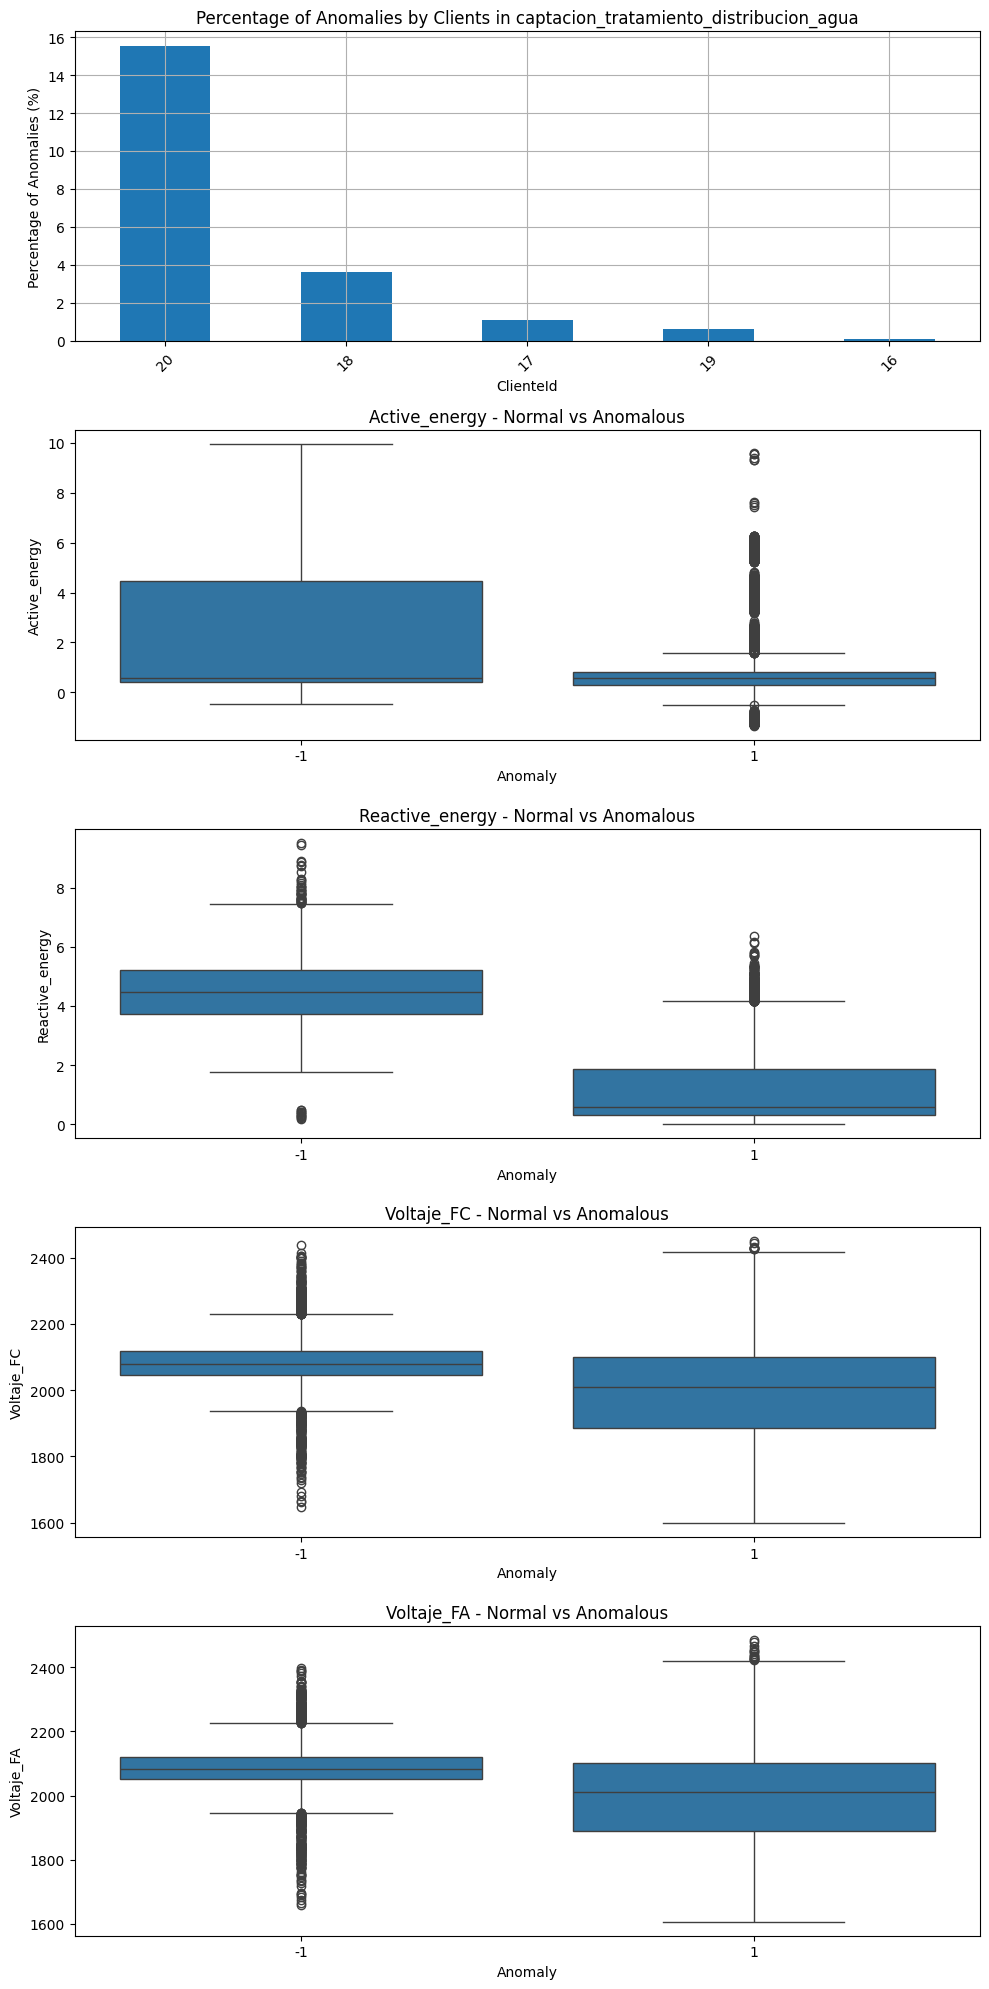

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Load the data
df = pd.read_csv('../data/output/consumo_datamart_gold.csv')

def plot_anomaly_percentage(sector):
    if sector == "Select a sector":  # Check if the placeholder item is selected
        print("Please select a valid sector.")
        return
    
    # Filter data for the selected sector
    sector_data = df[df['Sector_Economico'] == sector]

    fig, axs = plt.subplots(5, 1, figsize=(10, 20))  
    
    # Group by ClientId to calculate the percentage of anomalies per client
    grouped = sector_data.groupby('ClienteId').apply(
        lambda x: (x['Anomaly_Global'] == -1).sum() / len(x) * 100
    ).sort_values(ascending=False)
    
    # Create a bar plot for anomaly percentages per client
    grouped.plot(kind='bar', ax=axs[0])
    axs[0].set_title(f'Percentage of Anomalies by Clients in {sector}')
    axs[0].set_xlabel('ClienteId')
    axs[0].set_ylabel('Percentage of Anomalies (%)')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid(True)

    # Boxplot for Active_energy
    sns.boxplot(x='Anomaly_Global', y='Active_energy', data=sector_data, ax=axs[1])
    axs[1].set_title('Active_energy - Normal vs Anomalous')
    axs[1].set_xlabel('Anomaly')
    axs[1].set_ylabel('Active_energy')

    # Boxplot for Reactive_energy
    sns.boxplot(x='Anomaly_Global', y='Reactive_energy', data=sector_data, ax=axs[2])
    axs[2].set_title('Reactive_energy - Normal vs Anomalous')
    axs[2].set_xlabel('Anomaly')
    axs[2].set_ylabel('Reactive_energy')

    # Boxplot for Voltaje_FC
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FC', data=sector_data, ax=axs[3])
    axs[3].set_title('Voltaje_FC - Normal vs Anomalous')
    axs[3].set_xlabel('Anomaly')
    axs[3].set_ylabel('Voltaje_FC')

    # Boxplot for Voltaje_FA
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FA', data=sector_data, ax=axs[4])
    axs[4].set_title('Voltaje_FA - Normal vs Anomalous')
    axs[4].set_xlabel('Anomaly')
    axs[4].set_ylabel('Voltaje_FA')

    plt.tight_layout()
    plt.show()

# Get unique sectors
sectors = ['Select a sector'] + sorted(df['Sector_Economico'].unique().tolist())

# Dropdown widget to select the sector
sector_dropdown = widgets.Dropdown(
    options=sectors,
    description='Sector:',
    disabled=False,
)

# Define the function to handle the submit button click
def on_submit_button_clicked(b):
    clear_output(wait=True)
    display(sector_dropdown, button_box)
    plot_anomaly_percentage(sector_dropdown.value)

# Define the function to handle the clear button click
def on_clear_button_clicked(b):
    clear_output(wait=True)
    display(sector_dropdown, button_box)

# Create the Submit and Clear buttons with custom styles
submit_button = widgets.Button(description='Submit', button_style='primary')
clear_button = widgets.Button(description='Clear', button_style='danger')

# Apply custom styles
display(HTML("""
<style>
    .widget-button-primary {
        background-color: blue !important;
        color: white !important;
    }
    .widget-button-danger {
        background-color: red !important;
        color: white !important;
    }
</style>
"""))

# Link the buttons to their respective functions
submit_button.on_click(on_submit_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Arrange buttons horizontally
button_box = widgets.HBox([submit_button, clear_button])

# Display the dropdown widget and buttons
display(sector_dropdown, button_box)


## 4.2 Characterization of anomalies per sector and weekday

Dropdown(description='Sector:', index=1, options=('Select a sector', 'captacion_tratamiento_distribucion_agua'…

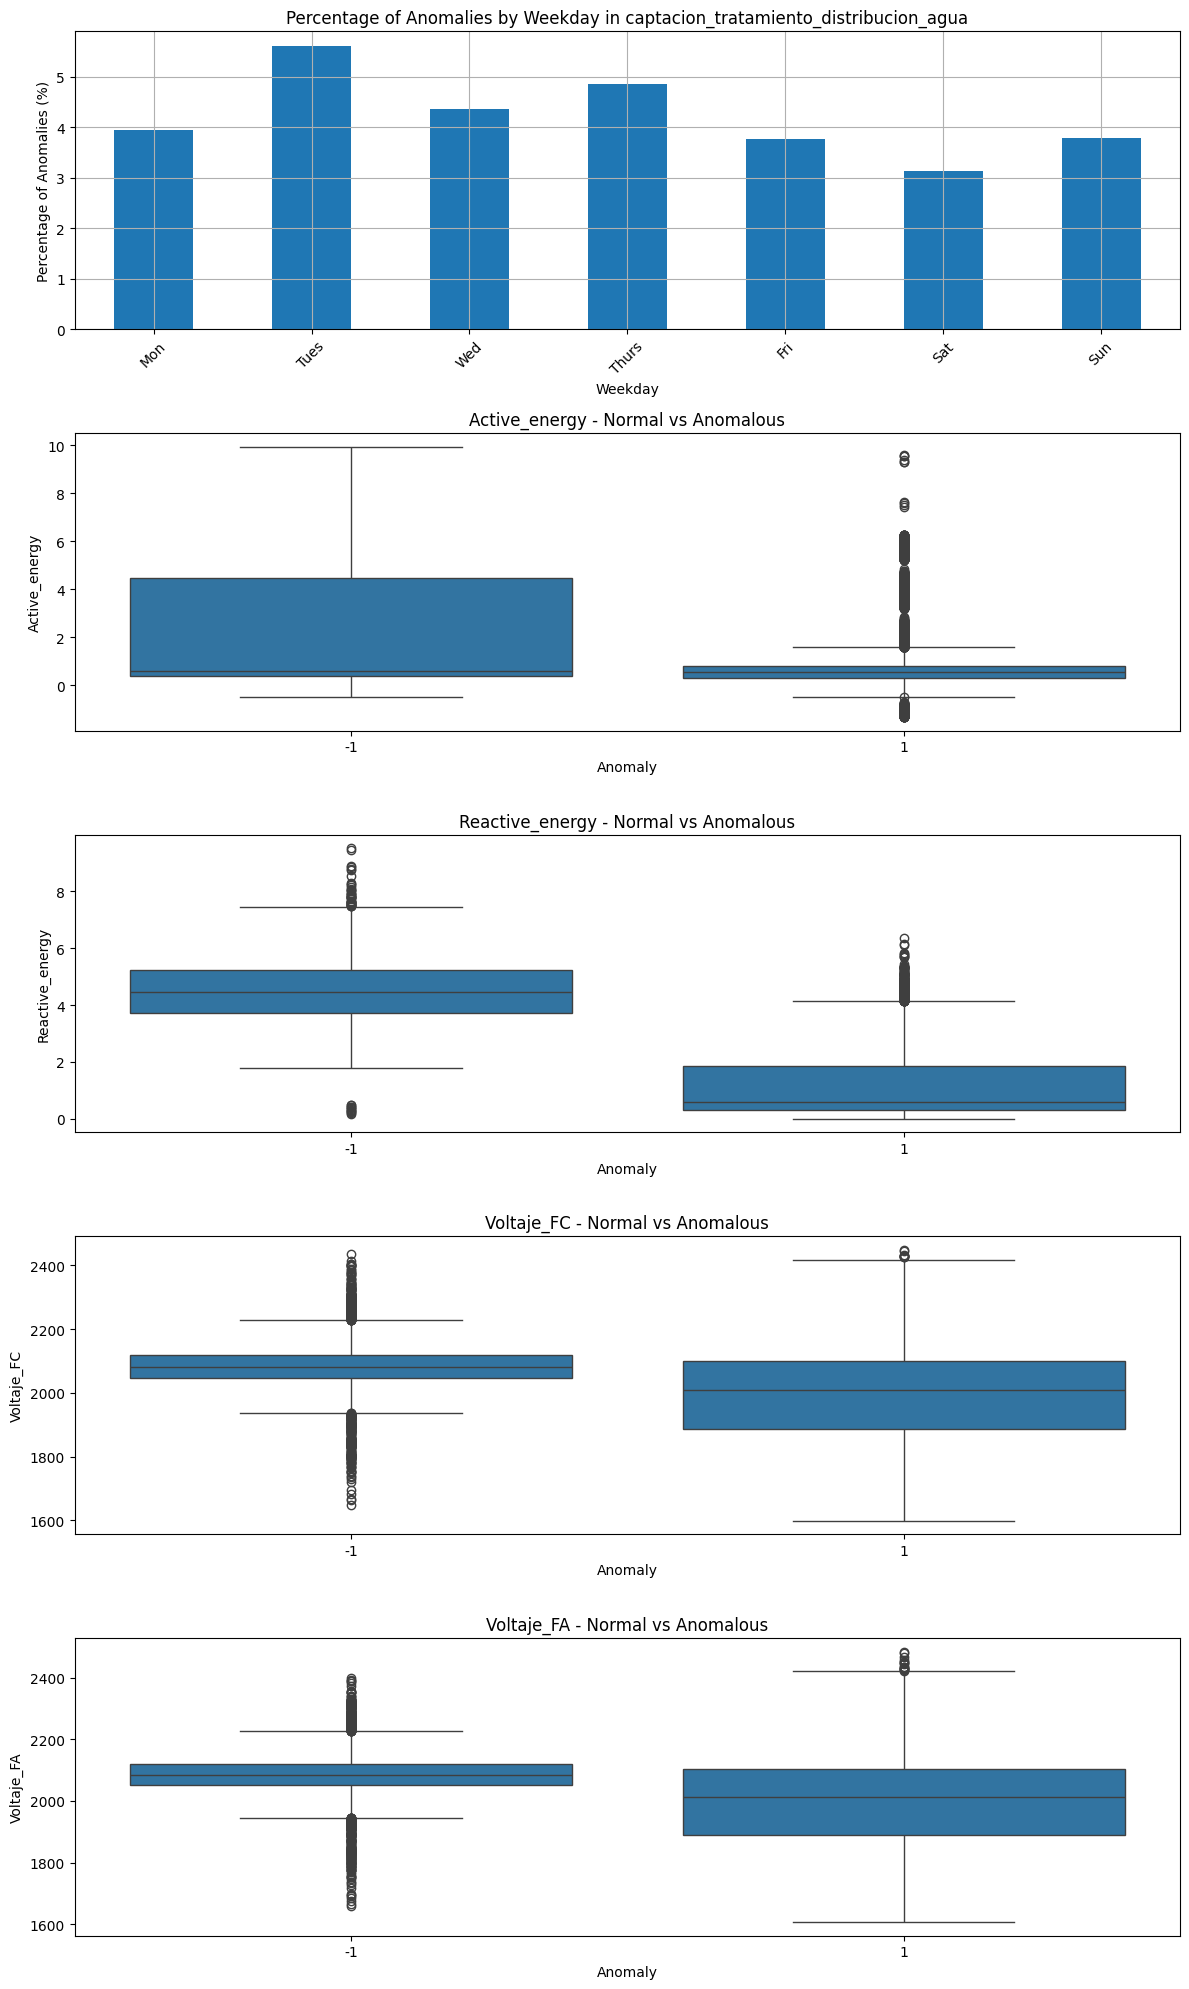

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Load the dataset
df = pd.read_csv('../data/output/consumo_datamart_gold.csv')

# Map of weekday numbers to names (adjust if different in your dataset)
weekday_map = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

def plot_anomaly_percentage(sector):
    if sector == "Select a sector":  # Check if the placeholder item is selected
        print("Please select a valid sector.")
        return
    
    # Filter data for the selected sector 
    sector_data = df[df['Sector_Economico'] == sector].copy()  
    
    # Map numeric weekdays to names, group by weekday, and calculate percentage of anomalies
    sector_data['Weekday_Name'] = sector_data['DiaSemana'].map(weekday_map)
    grouped = sector_data.groupby('Weekday_Name')['Anomaly_Global'].apply(
        lambda x: (x == -1).mean() * 100
    )

    fig, axs = plt.subplots(5, 1, figsize=(12, 20))  

    # Create a bar plot for anomaly percentages per weekday
    grouped.reindex(list(weekday_map.values())).plot(kind='bar', ax=axs[0])  
    axs[0].set_title(f'Percentage of Anomalies by Weekday in {sector}')
    axs[0].set_xlabel('Weekday')
    axs[0].set_ylabel('Percentage of Anomalies (%)')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid(True)

    # Boxplot for Active_energy
    sns.boxplot(x='Anomaly_Global', y='Active_energy', data=sector_data, ax=axs[1])
    axs[1].set_title('Active_energy - Normal vs Anomalous')
    axs[1].set_xlabel('Anomaly')
    axs[1].set_ylabel('Active_energy')

    # Boxplot for Reactive_energy
    sns.boxplot(x='Anomaly_Global', y='Reactive_energy', data=sector_data, ax=axs[2])
    axs[2].set_title('Reactive_energy - Normal vs Anomalous')
    axs[2].set_xlabel('Anomaly')
    axs[2].set_ylabel('Reactive_energy')

    # Boxplot for Voltaje_FC
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FC', data=sector_data, ax=axs[3])
    axs[3].set_title('Voltaje_FC - Normal vs Anomalous')
    axs[3].set_xlabel('Anomaly')
    axs[3].set_ylabel('Voltaje_FC')

    # Boxplot for Voltaje_FA
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FA', data=sector_data, ax=axs[4])
    axs[4].set_title('Voltaje_FA - Normal vs Anomalous')
    axs[4].set_xlabel('Anomaly')
    axs[4].set_ylabel('Voltaje_FA')

    plt.tight_layout()
    plt.show()

# Get unique sectors and add a placeholder at the start of the list
sectors = ['Select a sector'] + sorted(df['Sector_Economico'].unique().tolist())

# Create a dropdown widget for selecting sector
sector_dropdown = widgets.Dropdown(
    options=sectors,
    description='Sector:',
    disabled=False,
)

# Define the function to handle the submit button click
def on_submit_button_clicked(b):
    clear_output(wait=True)
    display(sector_dropdown, button_box)
    plot_anomaly_percentage(sector_dropdown.value)

# Define the function to handle the clear button click
def on_clear_button_clicked(b):
    clear_output(wait=True)
    display(sector_dropdown, button_box)

# Create the Submit and Clear buttons with custom styles
submit_button = widgets.Button(description='Submit', button_style='primary')
clear_button = widgets.Button(description='Clear', button_style='danger')

# Apply custom styles
display(HTML("""
<style>
    .widget-button-primary {
        background-color: blue !important;
        color: white !important;
    }
    .widget-button-danger {
        background-color: red !important;
        color: white !important;
    }
</style>
"""))

# Link the buttons to their respective functions
submit_button.on_click(on_submit_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Arrange buttons horizontally
button_box = widgets.HBox([submit_button, clear_button])


display(sector_dropdown, button_box)


## 4.3 Characterization of anomalies per sector/month

Dropdown(description='Sector:', index=1, options=('Select a sector', 'captacion_tratamiento_distribucion_agua'…

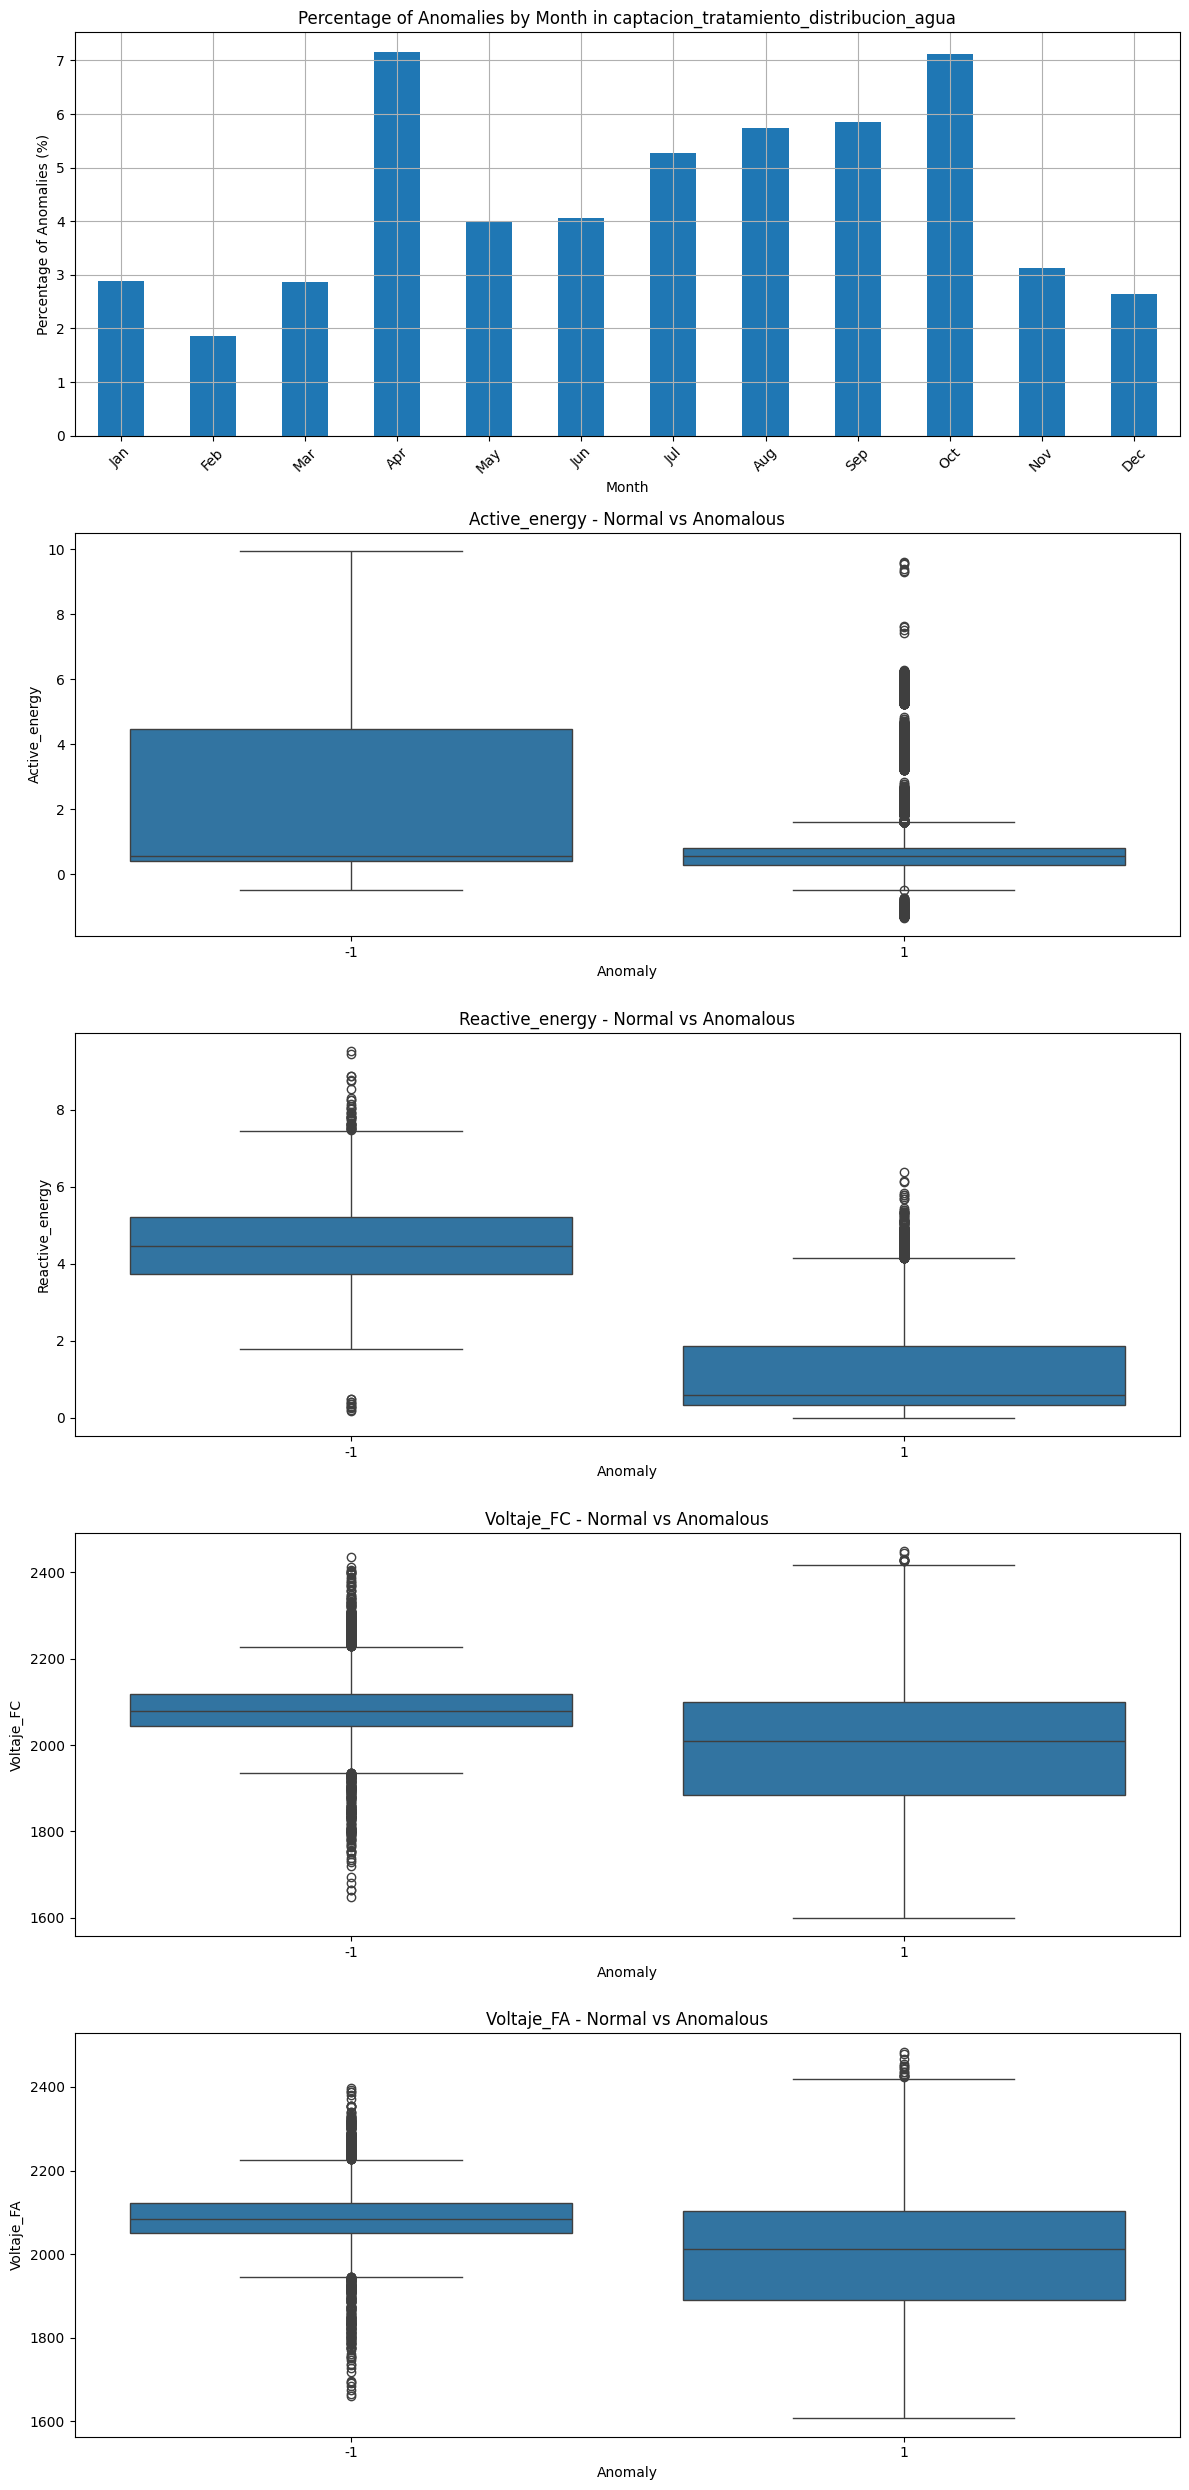

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Load the dataset
df = pd.read_csv('../data/output/consumo_datamart_gold.csv')

# Map of month numbers to names (adjust if different in your dataset)
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

def plot_anomaly_percentage(sector):
    if sector == "Select a sector":  # Check if the placeholder item is selected
        print("Please select a valid sector.")
        return
    
    # Filter data for the selected sector and explicitly create a copy
    sector_data = df[df['Sector_Economico'] == sector].copy()
    
    # Map numeric months to names, group by month, and calculate percentage of anomalies
    sector_data['Month_Name'] = sector_data['Mes'].map(month_map)
    grouped = sector_data.groupby('Month_Name')['Anomaly_Global'].apply(
        lambda x: (x == -1).mean() * 100
    )

    fig, axs = plt.subplots(5, 1, figsize=(12, 25))  

    # Create a bar plot for anomaly percentages per month
    grouped.reindex(list(month_map.values())).plot(kind='bar', ax=axs[0])
    axs[0].set_title(f'Percentage of Anomalies by Month in {sector}')
    axs[0].set_xlabel('Month')
    axs[0].set_ylabel('Percentage of Anomalies (%)')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid(True)

    # Boxplot for Active_energy
    sns.boxplot(x='Anomaly_Global', y='Active_energy', data=sector_data, ax=axs[1])
    axs[1].set_title('Active_energy - Normal vs Anomalous')
    axs[1].set_xlabel('Anomaly')
    axs[1].set_ylabel('Active_energy')

    # Boxplot for Reactive_energy
    sns.boxplot(x='Anomaly_Global', y='Reactive_energy', data=sector_data, ax=axs[2])
    axs[2].set_title('Reactive_energy - Normal vs Anomalous')
    axs[2].set_xlabel('Anomaly')
    axs[2].set_ylabel('Reactive_energy')

    # Boxplot for Voltaje_FC
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FC', data=sector_data, ax=axs[3])
    axs[3].set_title('Voltaje_FC - Normal vs Anomalous')
    axs[3].set_xlabel('Anomaly')
    axs[3].set_ylabel('Voltaje_FC')

    # Boxplot for Voltaje_FA
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FA', data=sector_data, ax=axs[4])
    axs[4].set_title('Voltaje_FA - Normal vs Anomalous')
    axs[4].set_xlabel('Anomaly')
    axs[4].set_ylabel('Voltaje_FA')

    # Adjust the layout of the plot to prevent overlap
    plt.tight_layout()
    plt.show()

# Get unique sectors and add a placeholder at the start of the list
sectors = ['Select a sector'] + sorted(df['Sector_Economico'].unique().tolist())

# Create a dropdown widget for selecting sector
sector_dropdown = widgets.Dropdown(
    options=sectors,
    description='Sector:',
    disabled=False,
)

# Define the function to handle the submit button click
def on_submit_button_clicked(b):
    clear_output(wait=True)
    display(sector_dropdown, button_box)
    plot_anomaly_percentage(sector_dropdown.value)

# Define the function to handle the clear button click
def on_clear_button_clicked(b):
    clear_output(wait=True)
    display(sector_dropdown, button_box)

# Create the Submit and Clear buttons with custom styles
submit_button = widgets.Button(description='Submit', button_style='primary')
clear_button = widgets.Button(description='Clear', button_style='danger')

# Apply custom styles
display(HTML("""
<style>
    .widget-button-primary {
        background-color: blue !important;
        color: white !important;
    }
    .widget-button-danger {
        background-color: red !important;
        color: white !important;
    }
</style>
"""))

# Link the buttons to their respective functions
submit_button.on_click(on_submit_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Arrange buttons horizontally
button_box = widgets.HBox([submit_button, clear_button])

# Display 
display(sector_dropdown, button_box)


## 4.4 Charaterization of anomalies per sector and hour

Dropdown(description='Sector:', index=1, options=('Select a sector', 'captacion_tratamiento_distribucion_agua'…

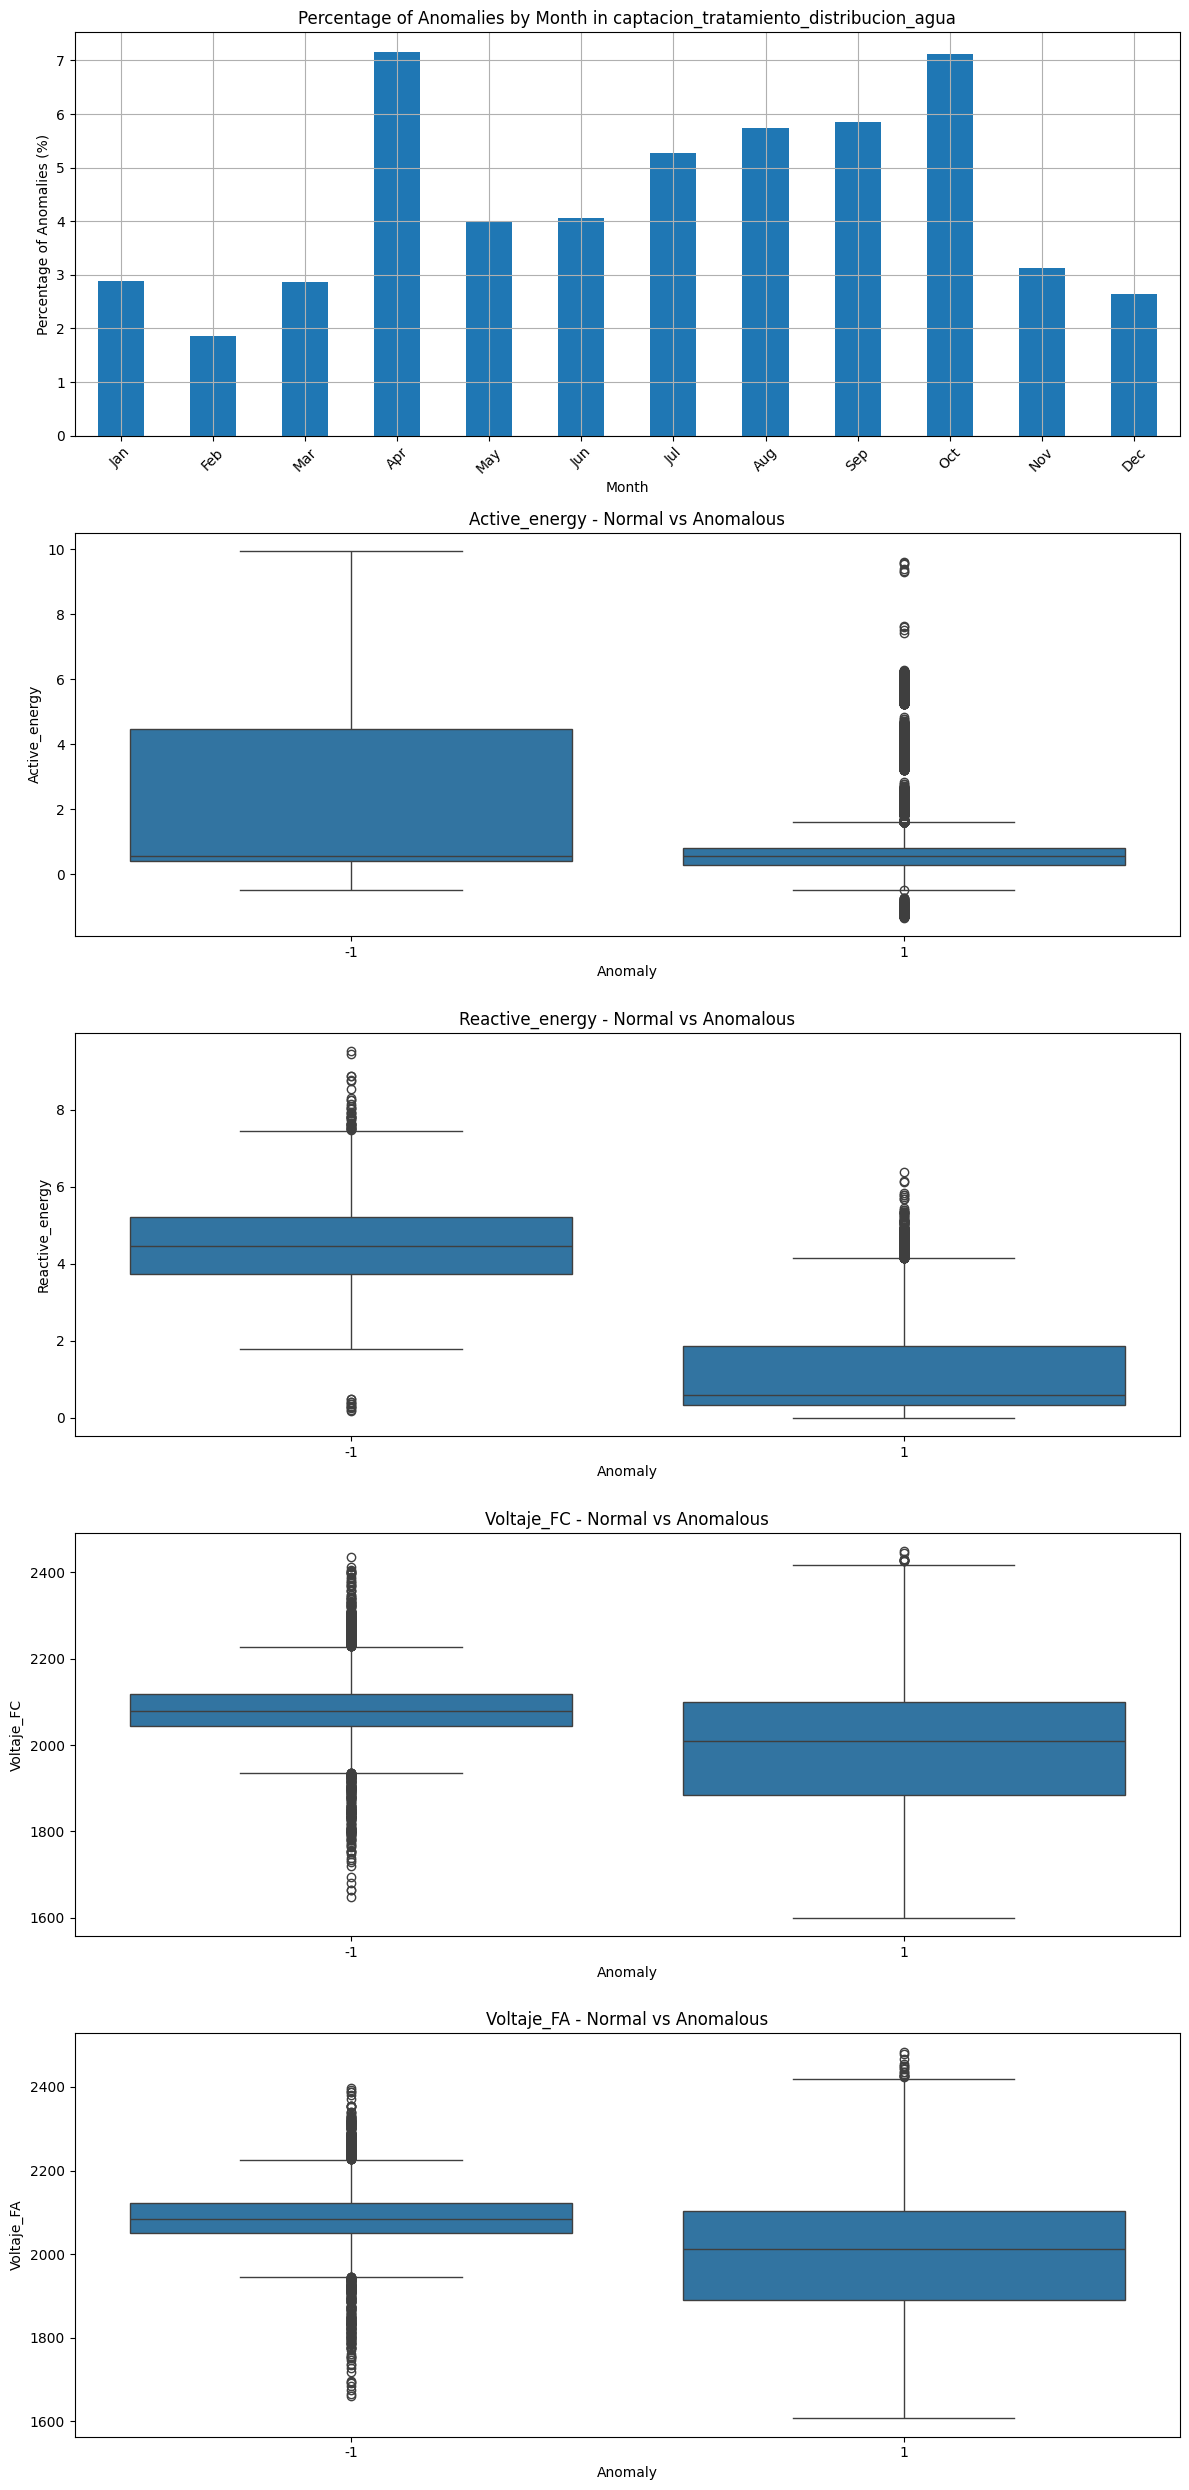

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Load the dataset
df = pd.read_csv('../data/output/consumo_datamart_gold.csv')

# Map of month numbers to names (adjust if different in your dataset)
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

def plot_anomaly_percentage(sector):
    if sector == "Select a sector":  # Check if the placeholder item is selected
        print("Please select a valid sector.")
        return
    
    # Filter data for the selected sector and explicitly create a copy
    sector_data = df[df['Sector_Economico'] == sector].copy()
    
    # Map numeric months to names, group by month, and calculate percentage of anomalies
    sector_data['Month_Name'] = sector_data['Mes'].map(month_map)
    grouped = sector_data.groupby('Month_Name')['Anomaly_Global'].apply(
        lambda x: (x == -1).mean() * 100
    )

    fig, axs = plt.subplots(5, 1, figsize=(12, 25))  # 5 rows, 1 column

    # Create a bar plot for anomaly percentages per month
    grouped.reindex(list(month_map.values())).plot(kind='bar', ax=axs[0])
    axs[0].set_title(f'Percentage of Anomalies by Month in {sector}')
    axs[0].set_xlabel('Month')
    axs[0].set_ylabel('Percentage of Anomalies (%)')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid(True)

    # Boxplot for Active_energy
    sns.boxplot(x='Anomaly_Global', y='Active_energy', data=sector_data, ax=axs[1])
    axs[1].set_title('Active_energy - Normal vs Anomalous')
    axs[1].set_xlabel('Anomaly')
    axs[1].set_ylabel('Active_energy')

    # Boxplot for Reactive_energy
    sns.boxplot(x='Anomaly_Global', y='Reactive_energy', data=sector_data, ax=axs[2])
    axs[2].set_title('Reactive_energy - Normal vs Anomalous')
    axs[2].set_xlabel('Anomaly')
    axs[2].set_ylabel('Reactive_energy')

    # Boxplot for Voltaje_FC
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FC', data=sector_data, ax=axs[3])
    axs[3].set_title('Voltaje_FC - Normal vs Anomalous')
    axs[3].set_xlabel('Anomaly')
    axs[3].set_ylabel('Voltaje_FC')

    # Boxplot for Voltaje_FA
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FA', data=sector_data, ax=axs[4])
    axs[4].set_title('Voltaje_FA - Normal vs Anomalous')
    axs[4].set_xlabel('Anomaly')
    axs[4].set_ylabel('Voltaje_FA')

    plt.tight_layout()
    plt.show()

# Get unique sectors and add a placeholder at the start of the list
sectors = ['Select a sector'] + sorted(df['Sector_Economico'].unique().tolist())

# Create a dropdown widget for selecting sector
sector_dropdown = widgets.Dropdown(
    options=sectors,
    description='Sector:',
    disabled=False,
)

# Define the function to handle the submit button click
def on_submit_button_clicked(b):
    clear_output(wait=True)
    display(sector_dropdown, button_box)
    plot_anomaly_percentage(sector_dropdown.value)

# Define the function to handle the clear button click
def on_clear_button_clicked(b):
    clear_output(wait=True)
    display(sector_dropdown, button_box)

# Create the Submit and Clear buttons with custom styles
submit_button = widgets.Button(description='Submit', button_style='primary')
clear_button = widgets.Button(description='Clear', button_style='danger')

# Apply custom styles
display(HTML("""
<style>
    .widget-button-primary {
        background-color: blue !important;
        color: white !important;
    }
    .widget-button-danger {
        background-color: red !important;
        color: white !important;
    }
</style>
"""))

# Link the buttons to their respective functions
submit_button.on_click(on_submit_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Arrange buttons horizontally
button_box = widgets.HBox([submit_button, clear_button])

# Display 
display(sector_dropdown, button_box)


## 4.4 Characterization using heatmaps per sector/ weekday and hours

Dropdown(description='Sector:', index=1, options=('Select a sector', 'captacion_tratamiento_distribucion_agua'…

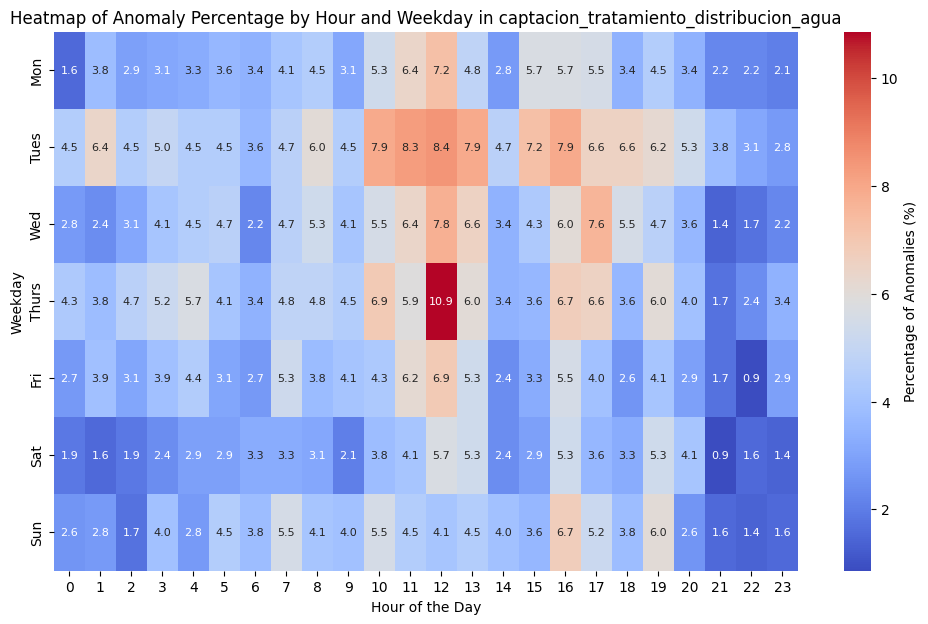

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Load the dataset
df = pd.read_csv('../data/output/consumo_datamart_gold.csv')

# Map of weekday numbers to names
weekday_map = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

# Define the custom order for weekdays
weekday_order = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

def plot_anomaly_heatmap(sector):
    if sector == "Select a sector":  # Check if the placeholder item is selected
        print("Please select a valid sector.")
        return
    
    # Filter data for the selected sector and create a copy
    sector_data = df[df['Sector_Economico'] == sector].copy()
    
    # Map numeric weekdays to names
    sector_data['Weekday_Name'] = sector_data['DiaSemana'].map(weekday_map)
    
    # Create a pivot table for percentage of anomalies
    sector_data['Is_Anomaly'] = (sector_data['Anomaly_Global'] == -1).astype(int)
    heatmap_data = sector_data.pivot_table(index='Weekday_Name', columns='Hora', values='Is_Anomaly', aggfunc='mean')
    
    # Reindex the DataFrame according to the custom weekday order
    heatmap_data = heatmap_data.reindex(weekday_order)
    
    # Plot heatmap
    plt.figure(figsize=(12, 7))
    sns.heatmap(heatmap_data * 100, annot=True, fmt=".1f", cmap="coolwarm", 
                cbar_kws={'label': 'Percentage of Anomalies (%)'},
                annot_kws={'size': 8})  # Smaller font size for annotations
    plt.title(f'Heatmap of Anomaly Percentage by Hour and Weekday in {sector}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Weekday')
    plt.show()

# Get unique sectors and add a placeholder at the start of the list
sectors = ['Select a sector'] + sorted(df['Sector_Economico'].unique().tolist())

# Create a dropdown widget for selecting sector
sector_dropdown = widgets.Dropdown(
    options=sectors,
    description='Sector:',
    disabled=False,
)

# Define the function to handle the submit button click
def on_submit_button_clicked(b):
    clear_output(wait=True)
    display(sector_dropdown, button_box)
    plot_anomaly_heatmap(sector_dropdown.value)

# Define the function to handle the clear button click
def on_clear_button_clicked(b):
    clear_output(wait=True)
    display(sector_dropdown, button_box)

# Create the Submit and Clear buttons with custom styles
submit_button = widgets.Button(description='Submit', button_style='primary')
clear_button = widgets.Button(description='Clear', button_style='danger')

# Apply custom styles
display(HTML("""
<style>
    .widget-button-primary {
        background-color: blue !important;
        color: white !important;
    }
    .widget-button-danger {
        background-color: red !important;
        color: white !important;
    }
</style>
"""))

# Link the buttons to their respective functions
submit_button.on_click(on_submit_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Arrange buttons horizontally
button_box = widgets.HBox([submit_button, clear_button])

# Display the dropdown widget and buttons
display(sector_dropdown, button_box)


Dropdown(description='Cluster:', index=1, options=('Select a cluster', '0', '1', '2', '3'), value='0')

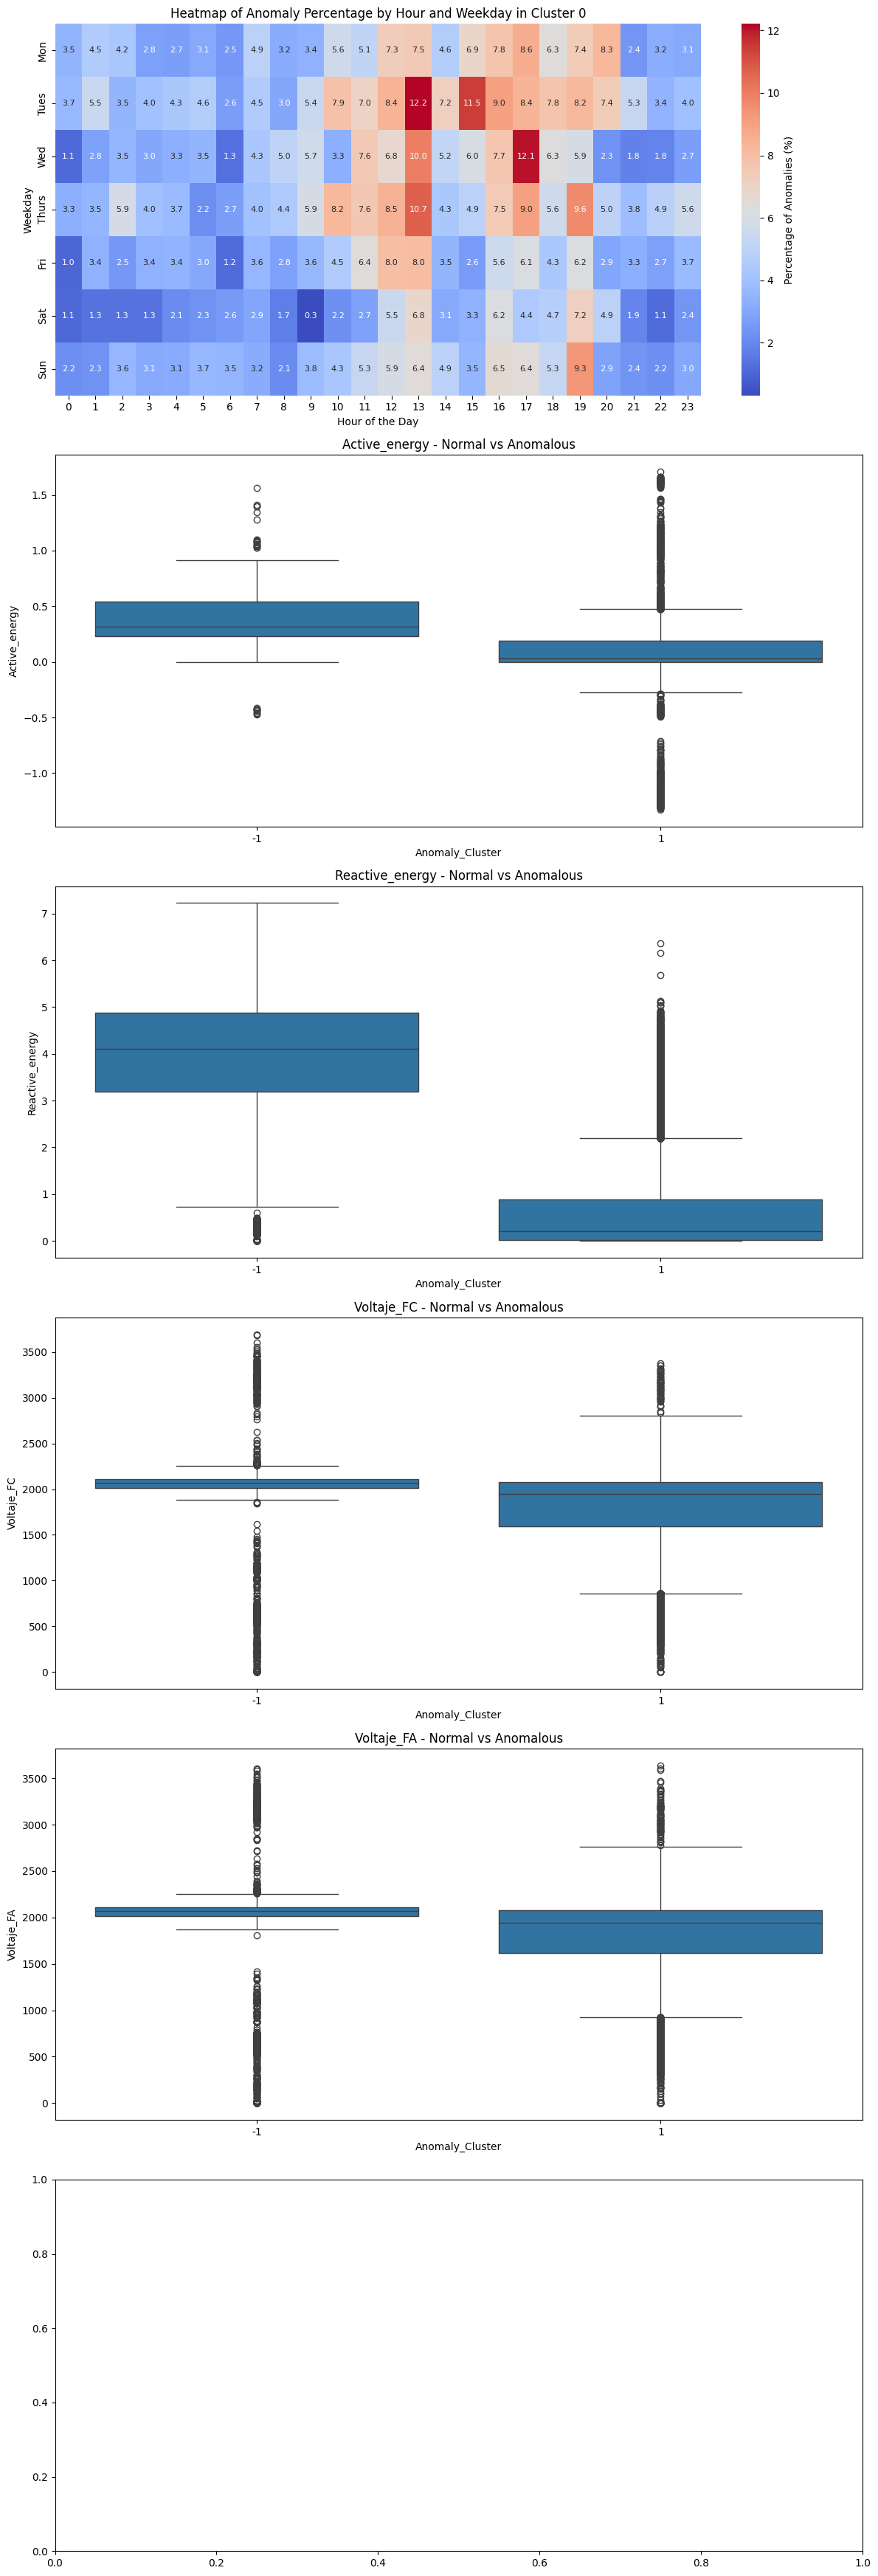

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Load the dataset
df = pd.read_csv('../data/output/consumo_datamart_gold.csv')

# Map of weekday numbers to names
weekday_map = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

# Define the custom order for weekdays
weekday_order = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

def plot_anomaly_heatmap(cluster):
    if cluster == "Select a cluster":  # Check if the placeholder item is selected
        print("Please select a valid cluster.")
        return
    
    # Filter data for the selected cluster and create a copy
    cluster_data = df[df['Cluster'] == int(cluster)].copy()
    
    # Map numeric weekdays to names
    cluster_data['Weekday_Name'] = cluster_data['DiaSemana'].map(weekday_map)
    
    # Create a pivot table for percentage of anomalies
    cluster_data['Is_Anomaly'] = (cluster_data['Anomaly_Global'] == -1).astype(int)
    heatmap_data = cluster_data.pivot_table(index='Weekday_Name', columns='Hora', values='Is_Anomaly', aggfunc='mean')
    
    # Reindex the DataFrame according to the custom weekday order
    heatmap_data = heatmap_data.reindex(weekday_order)
    
    # Plot heatmap
    fig, axs = plt.subplots(6, 1, figsize=(12, 35))  # 6 rows, 1 column
    sns.heatmap(heatmap_data * 100, annot=True, fmt=".1f", cmap="coolwarm", 
                cbar_kws={'label': 'Percentage of Anomalies (%)'},
                annot_kws={'size': 8}, ax=axs[0])  # Smaller font size for annotations
    axs[0].set_title(f'Heatmap of Anomaly Percentage by Hour and Weekday in Cluster {cluster}')
    axs[0].set_xlabel('Hour of the Day')
    axs[0].set_ylabel('Weekday')

    # Boxplot for Active_energy
    sns.boxplot(x='Anomaly_Global', y='Active_energy', data=cluster_data, ax=axs[1])
    axs[1].set_title('Active_energy - Normal vs Anomalous')
    axs[1].set_xlabel('Anomaly_Cluster')
    axs[1].set_ylabel('Active_energy')

    # Boxplot for Reactive_energy
    sns.boxplot(x='Anomaly_Global', y='Reactive_energy', data=cluster_data, ax=axs[2])
    axs[2].set_title('Reactive_energy - Normal vs Anomalous')
    axs[2].set_xlabel('Anomaly_Cluster')
    axs[2].set_ylabel('Reactive_energy')

    # Boxplot for Voltaje_FC
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FC', data=cluster_data, ax=axs[3])
    axs[3].set_title('Voltaje_FC - Normal vs Anomalous')
    axs[3].set_xlabel('Anomaly_Cluster')
    axs[3].set_ylabel('Voltaje_FC')

    # Boxplot for Voltaje_FA
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FA', data=cluster_data, ax=axs[4])
    axs[4].set_title('Voltaje_FA - Normal vs Anomalous')
    axs[4].set_xlabel('Anomaly_Cluster')
    axs[4].set_ylabel('Voltaje_FA')

    # Adjust the layout of the plot to prevent overlap
    plt.tight_layout()
    plt.show()

# Get unique clusters and add a placeholder at the start of the list
clusters = ['Select a cluster'] + sorted(df['Cluster'].unique().astype(str).tolist())

# Create a dropdown widget for selecting cluster
cluster_dropdown = widgets.Dropdown(
    options=clusters,
    description='Cluster:',
    disabled=False,
)

# Define the function to handle the submit button click
def on_submit_button_clicked(b):
    clear_output(wait=True)
    display(cluster_dropdown, button_box)
    plot_anomaly_heatmap(cluster_dropdown.value)

# Define the function to handle the clear button click
def on_clear_button_clicked(b):
    clear_output(wait=True)
    display(cluster_dropdown, button_box)

# Create the Submit and Clear buttons with custom styles
submit_button = widgets.Button(description='Submit', button_style='primary')
clear_button = widgets.Button(description='Clear', button_style='danger')

# Apply custom styles
display(HTML("""
<style>
    .widget-button-primary {
        background-color: blue !important;
        color: white !important;
    }
    .widget-button-danger {
        background-color: red !important;
        color: white !important;
    }
</style>
"""))

# Link the buttons to their respective functions
submit_button.on_click(on_submit_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Arrange buttons horizontally
button_box = widgets.HBox([submit_button, clear_button])

display(cluster_dropdown, button_box)


# Plot the time serie per client and dates range 

IntSlider(value=2, description='Client:', max=30, min=1)

DatePicker(value=datetime.date(2022, 2, 15), description='Start Date', step=1)

DatePicker(value=datetime.date(2022, 2, 28), description='End Date', step=1)

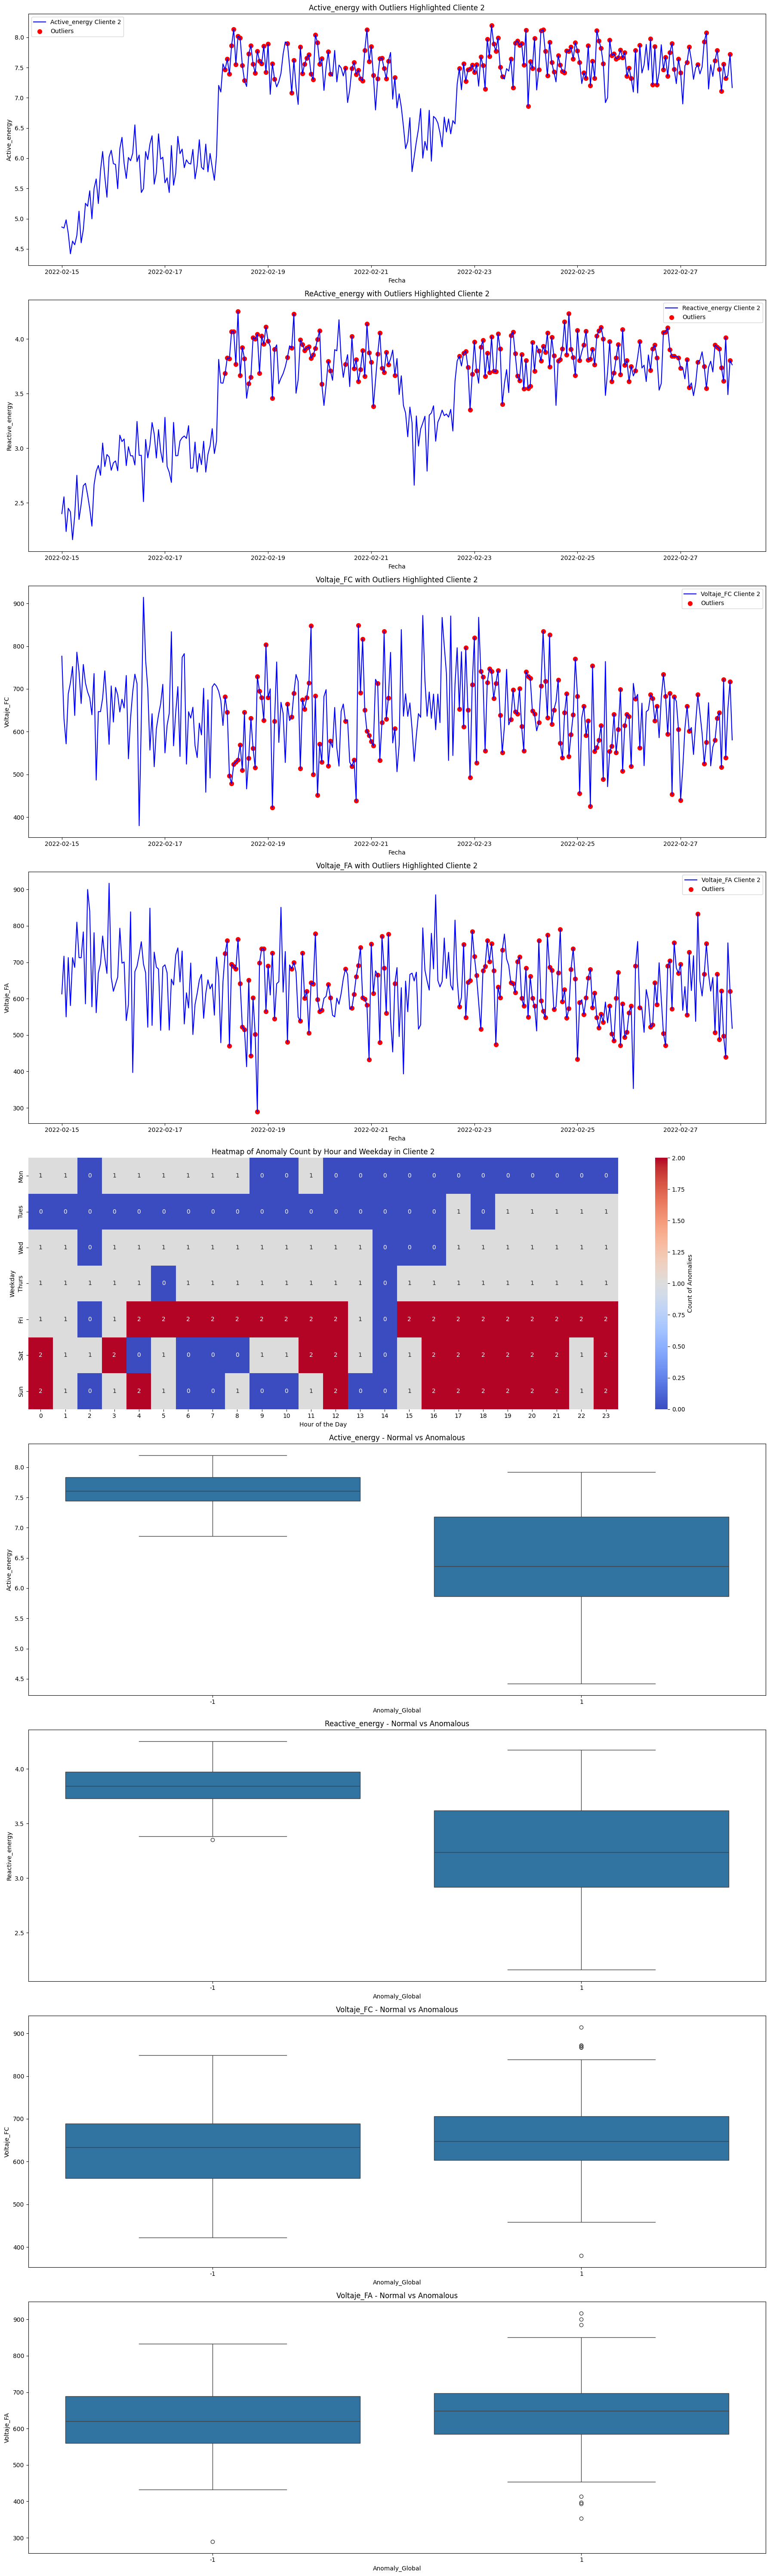

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Load the data
df = pd.read_csv('../data/output/consumo_datamart_gold.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Map of weekday numbers to names
weekday_map = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

# Custom order for weekdays
weekday_order = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# Define the function to plot the data
def plot_anomalies(client, start_date, end_date):
    # Convert date objects to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    combined_df = df[(df['ClienteId'] == client) & (df['Fecha'] >= start_date) & (df['Fecha'] <= end_date)]
    consistent_outliers_list = combined_df[combined_df['Anomaly_Global'] == -1].index.tolist()

    fig, axs = plt.subplots(9, 1, figsize=(18, 60))  # 9 rows, 1 column

    # Plot for Active_energy
    axs[0].plot(combined_df['Fecha'], combined_df['Active_energy'], 'b-', label=f'Active_energy Cliente {client}', markersize=5)
    axs[0].scatter(combined_df.loc[consistent_outliers_list, 'Fecha'], combined_df.loc[consistent_outliers_list, 'Active_energy'], color='red', s=50, label='Outliers')
    axs[0].set_title(f'Active_energy with Outliers Highlighted Cliente {client}')
    axs[0].set_xlabel('Fecha')
    axs[0].set_ylabel('Active_energy')
    axs[0].legend()

    # Plot for Reactive_energy
    axs[1].plot(combined_df['Fecha'], combined_df['Reactive_energy'], 'b-', label=f'Reactive_energy Cliente {client}', markersize=5)
    axs[1].scatter(combined_df.loc[consistent_outliers_list, 'Fecha'], combined_df.loc[consistent_outliers_list, 'Reactive_energy'], color='red', s=50, label='Outliers')
    axs[1].set_title(f'ReActive_energy with Outliers Highlighted Cliente {client}')
    axs[1].set_xlabel('Fecha')
    axs[1].set_ylabel('Reactive_energy')
    axs[1].legend()

    # Plot for Voltaje_FC
    axs[2].plot(combined_df['Fecha'], combined_df['Voltaje_FC'], 'b-', label=f'Voltaje_FC Cliente {client}', markersize=5)
    axs[2].scatter(combined_df.loc[consistent_outliers_list, 'Fecha'], combined_df.loc[consistent_outliers_list, 'Voltaje_FC'], color='red', s=50, label='Outliers')
    axs[2].set_title(f'Voltaje_FC with Outliers Highlighted Cliente {client}')
    axs[2].set_xlabel('Fecha')
    axs[2].set_ylabel('Voltaje_FC')
    axs[2].legend()

    # Plot for Voltaje_FA
    axs[3].plot(combined_df['Fecha'], combined_df['Voltaje_FA'], 'b-', label=f'Voltaje_FA Cliente {client}', markersize=5)
    axs[3].scatter(combined_df.loc[consistent_outliers_list, 'Fecha'], combined_df.loc[consistent_outliers_list, 'Voltaje_FA'], color='red', s=50, label='Outliers')
    axs[3].set_title(f'Voltaje_FA with Outliers Highlighted Cliente {client}')
    axs[3].set_xlabel('Fecha')
    axs[3].set_ylabel('Voltaje_FA')
    axs[3].legend()

    # Prepare heatmap data
    combined_df['Weekday'] = combined_df['Fecha'].dt.dayofweek.map(weekday_map)
    combined_df['Hour'] = combined_df['Fecha'].dt.hour
    combined_df['Is_Anomaly'] = combined_df['Anomaly_Global'] == -1

    heatmap_data = combined_df.pivot_table(index='Weekday', columns='Hour', values='Is_Anomaly', aggfunc='sum').reindex(weekday_order)

    # Plot heatmap
    sns.heatmap(heatmap_data, ax=axs[4], annot=True, fmt=".0f", cmap="coolwarm",
                cbar_kws={'label': 'Count of Anomalies'}, annot_kws={'size': 10})
    axs[4].set_title(f'Heatmap of Anomaly Count by Hour and Weekday in Cliente {client}')
    axs[4].set_xlabel('Hour of the Day')
    axs[4].set_ylabel('Weekday')

    # Boxplot for Active_energy
    sns.boxplot(x='Anomaly_Global', y='Active_energy', data=combined_df, ax=axs[5])
    axs[5].set_title('Active_energy - Normal vs Anomalous')
    axs[5].set_xlabel('Anomaly_Global')
    axs[5].set_ylabel('Active_energy')

    # Boxplot for Reactive_energy
    sns.boxplot(x='Anomaly_Global', y='Reactive_energy', data=combined_df, ax=axs[6])
    axs[6].set_title('Reactive_energy - Normal vs Anomalous')
    axs[6].set_xlabel('Anomaly_Global')
    axs[6].set_ylabel('Reactive_energy')

    # Boxplot for Voltaje_FC
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FC', data=combined_df, ax=axs[7])
    axs[7].set_title('Voltaje_FC - Normal vs Anomalous')
    axs[7].set_xlabel('Anomaly_Global')
    axs[7].set_ylabel('Voltaje_FC')

    # Boxplot for Voltaje_FA
    sns.boxplot(x='Anomaly_Global', y='Voltaje_FA', data=combined_df, ax=axs[8])
    axs[8].set_title('Voltaje_FA - Normal vs Anomalous')
    axs[8].set_xlabel('Anomaly_Global')
    axs[8].set_ylabel('Voltaje_FA')

    # Adjust the layout of the plot to prevent overlap
    plt.tight_layout()
    plt.show()

# Define the widgets
client_widget = widgets.IntSlider(value=1, min=1, max=30, step=1, description='Client:')
start_date_widget = widgets.DatePicker(description='Start Date', value=df['Fecha'].min().date())
end_date_widget = widgets.DatePicker(description='End Date', value=df['Fecha'].max().date())
submit_button = widgets.Button(description='Submit', button_style='primary')
clear_button = widgets.Button(description='Clear', button_style='danger')

# Apply custom styles
display(HTML("""
<style>
    .widget-button-primary {
        background-color: blue !important;
        color: white !important;
    }
    .widget-button-danger {
        background-color: red !important;
        color: white !important;
    }
</style>
"""))

# Define the function to handle the submit button click
def on_submit_button_clicked(b):
    clear_output(wait=True)
    display(client_widget, start_date_widget, end_date_widget, button_box)
    plot_anomalies(client_widget.value, start_date_widget.value, end_date_widget.value)

# Define the function to handle the clear button click
def on_clear_button_clicked(b):
    clear_output(wait=True)
    display(client_widget, start_date_widget, end_date_widget, button_box)

# Link the buttons to their respective functions
submit_button.on_click(on_submit_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Arrange buttons horizontally
button_box = widgets.HBox([submit_button, clear_button])

# Display the widgets
display(client_widget, start_date_widget, end_date_widget, button_box)
